## Investigating Netflix Movies and Guest Stars in The Office

Manipulating and visualizing movie and TV data.

#### Project Description

You’ll gain experience in an essential data science skill — exploratory data analysis (EDA). This will allow you to perform critical tasks such as manipulating raw data and drawing conclusions from plots you create of the data.

### Project Tasks

1. Loading your friend's data into a dictionary
2. Creating a DataFrame from a dictionary
3. A visual inspection of our data
4. Loading the rest of the data from a CSV
5. Filtering for movies!
6. Creating a scatter plot
7. Digging deeper
8. Marking non-feature films
9. Plotting with color!
10. What next?

In [2]:
# importing necessary libraris..
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

### 1. Loading your friend's data into a dictionary
<p>Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by <a href="https://www.marketwatch.com/story/netflix-shares-close-up-8-for-yet-another-record-high-2020-07-10">market capitalization</a>, boasting over 200 million subscribers as of <a href="https://www.cbsnews.com/news/netflix-tops-200-million-subscribers-but-faces-growing-challenge-from-disney-plus/">January 2021</a>.</p>
<p>Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining. </p>
<p>As evidence of this, they have provided us with the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.</p>
<p>If we're going to be working with this data, we know a good place to start would be to probably start working with <code>pandas</code>.

In [3]:
# Lets suppose, our fiend provides this data for exploration
# list of years from 2011 to 2020 and a list durations of the average movie lengths (m)
years_list = list( np.arange (2011, 2021, 1) )
avg_movies_length = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

In [4]:
print("The value of years_list:", years_list)
print("Total years in years_list:", len(years_list))

print("The value of avg_movies_length:", avg_movies_length)
print("Total years in avg_movies_length:", len(avg_movies_length))

The value of years_list: [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Total years in years_list: 10
The value of avg_movies_length: [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]
Total years in avg_movies_length: 10


### 2. Creating a DataFrame from a dictionary
<p>To convert our dictionary <code>movie_dict</code> to a <code>pandas</code> DataFrame, we will first need to import the library under its usual alias. We'll also want to inspect our DataFrame to ensure it was created correctly. Let's perform these steps now.</p>

In [21]:
# creating a dictionary of Year and Duration
movie_dict = {
    "Year": years_list,
    "Duration (m)": avg_movies_length
}

print("The value of movie_dict:\n", movie_dict)

# creating a data-frame using dictionary above
durations_df = pd.DataFrame(movie_dict)

The value of movie_dict:
 {'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'Duration (m)': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


In [22]:
print("Data-type of durations_df:", type(durations_df))
print("Shape of the data-frame:", durations_df.shape)
durations_df

Data-type of durations_df: <class 'pandas.core.frame.DataFrame'>
Shape of the data-frame: (10, 2)


,Year,Duration (m)
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


### 3. A visual inspection of our data-frame data
<p>Alright, we now have a <code>pandas</code> DataFrame, the most common way to work with tabular data in Python. Now back to the task at hand. We want to follow up on our friend's assertion that movie lengths have been decreasing over time. A great place to start will be a visualization of the data.</p>
<p>Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations. There are many ways to visualize data in Python, but <code>matploblib.pyplot</code> is one of the most common packages to do so.</p>
<p><em>Note: In order for us to correctly test your plot, you will need to initalize a <code>matplotlib.pyplot</code> Figure object, which we have already provided in the cell below.</em></p>

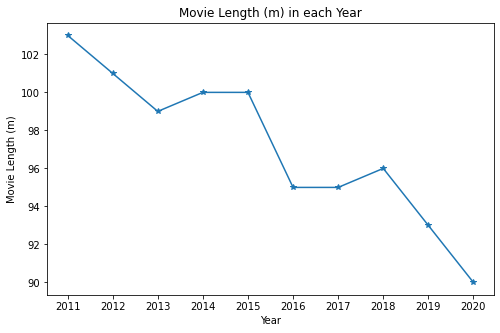

In [25]:
# Create a line plot to explore data
plt.figure(figsize = (8, 5))

plt.plot(durations_df['Year'], durations_df['Duration (m)'], '*-')

plt.title("Movie Length (m) in each Year")
plt.xlabel("Year")
plt.ylabel("Movie Length (m)")

# setting xticks to include all years
plt.xticks( list(durations_df['Year']) )

plt.show()

### 4. Loading the rest of the data from a CSV and extracting basic information
<p>Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:</p>
<ol>
<li>What does this trend look like over a longer period of time?</li>
<li>Is this explainable by something like the genre of entertainment?</li>
</ol>
<p>Upon asking our friend for the original CSV they used to perform their analyses, they gladly oblige and send it. We now have access to the CSV file, available at the path <code>"datasets/netflix_data.csv"</code>. Let's create another DataFrame, this time with all of the data. Given the length of our friend's data, printing the whole DataFrame is probably not a good idea, so we will inspect it by printing only the first five rows.</p>

In [8]:
# laoding the dataset: netflix_data.csv
netflix_data_df = pd.read_csv('datasets/netflix_data.csv')
netflix_data_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies


In [9]:
print("Dataset Column names:",netflix_data_df.columns )
print("Shape (number of rows and columns) in netflix_data_df", netflix_data_df.shape)

Dataset Column names: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')
Shape (number of rows and columns) in netflix_data_df (7787, 11)


In [10]:
print("dataset column information:")
netflix_data_df.info()

# some columns have missing data.

dataset column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [11]:
#  number of unique values in each column
print("Total number of unique (distinct) values in each column:")
netflix_data_df.nunique()

Total number of unique (distinct) values in each column:


show_id         7787
type               2
title           7787
director        4049
cast            6831
country           81
date_added      1565
release_year      73
duration         206
description     7769
genre             35
dtype: int64

In [12]:
# Do the columns have missing or NULL values
netflix_data_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

### 5. Filtering for movies only!
<p>Okay, we have our data! Now we can dive in and start looking at movie lengths. </p>
<p>Or can we? Looking at the first five rows of our new DataFrame, we notice a column <code>type</code>. Scanning the column, it's clear there are also TV shows in the dataset! Moreover, the <code>duration</code> column we planned to use seems to represent different values depending on whether the row is a movie or a show (perhaps the number of minutes versus the number of seasons)?</p>
<p>Fortunately, a DataFrame allows us to filter data quickly, and we can select rows where <code>type</code> is <code>Movie</code>. While we're at it, we don't need information from all of the columns, so let's create a new DataFrame <code>netflix_movies</code> containing only <code>title</code>, <code>country</code>, <code>genre</code>, <code>release_year</code>, and <code>duration</code>.</p>
<p>Let's put our data subsetting skills to work!</p>

In [13]:
print("Unique values in 'type' column:", netflix_data_df['type'].unique())

# Filtering only the Movie type
netflix_df_movies_only = netflix_data_df.loc[ netflix_data_df['type'] == 'Movie', :]

netflix_df_movies_only.head()

Unique values in 'type' column: ['TV Show' 'Movie']


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [49]:
# Further subsetting the data-frame.
cols_to_select = ['title', 'country', 'genre', 'release_year', 'duration']
netflix_movies_col_subset = netflix_df_movies_only.loc[:, cols_to_select ]

display("Printing first five rows:", netflix_movies_col_subset.head())
netflix_movies_col_subset.shape

'Printing first five rows:'

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


(5377, 5)

### 6. Exploring data using visualization
<p>Okay, now we're getting somewhere. We've read in the raw data, selected rows of movies, and have limited our DataFrame to our columns of interest. Let's try visualizing the data again to inspect the data over a longer range of time.</p>
<p>This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.</p>
<p><em>Note: Although not taught in Intermediate Python, we have provided you the code <code>fig = plt.figure(figsize=(12,8))</code> to increase the size of the plot (to help you see the results), as well as to assist with testing. For more information on how to create or work with a <code>matplotlib</code> <code>figure</code>, refer to the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html">documentation</a>.</em></p>

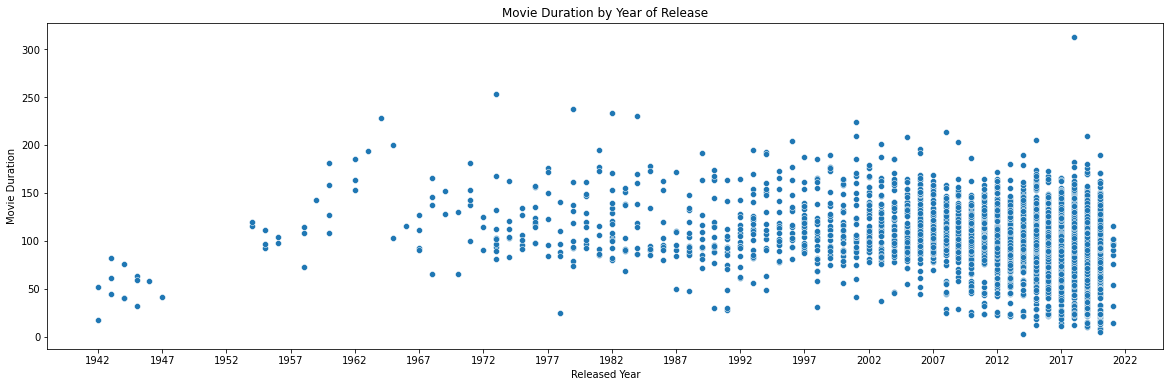

In [15]:
released_year_min = netflix_movies_col_subset['release_year'].min()
released_year_max = netflix_movies_col_subset['release_year'].max()

plt.figure(figsize = (20, 6))
sns.scatterplot(data = netflix_movies_col_subset, x = 'release_year', y = 'duration')

plt.title("Movie Duration by Year of Release")
plt.xlabel("Released Year")
plt.ylabel("Movie Duration")

# setting the x tickes to show clearly
plt.xticks( list(range(released_year_min, released_year_max+5, 5)) )


plt.show()

In [16]:
print("Number of unique values in 'genre' is:", len(netflix_movies_col_subset['genre'].unique()) )
genre_value_counts = netflix_movies_col_subset['genre'].value_counts(ascending = False)

genre_value_counts

Number of unique values in 'genre' is: 19


Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
Children                 502
Stand-Up                 321
Horror Movies            244
International Movies     114
Classic Movies            77
Uncategorized             56
Thrillers                 49
Independent Movies        20
Anime Features            19
Music                     17
Cult Movies               12
Sci-Fi                    11
Romantic Movies            3
LGBTQ Movies               1
Sports Movies              1
Name: genre, dtype: int64

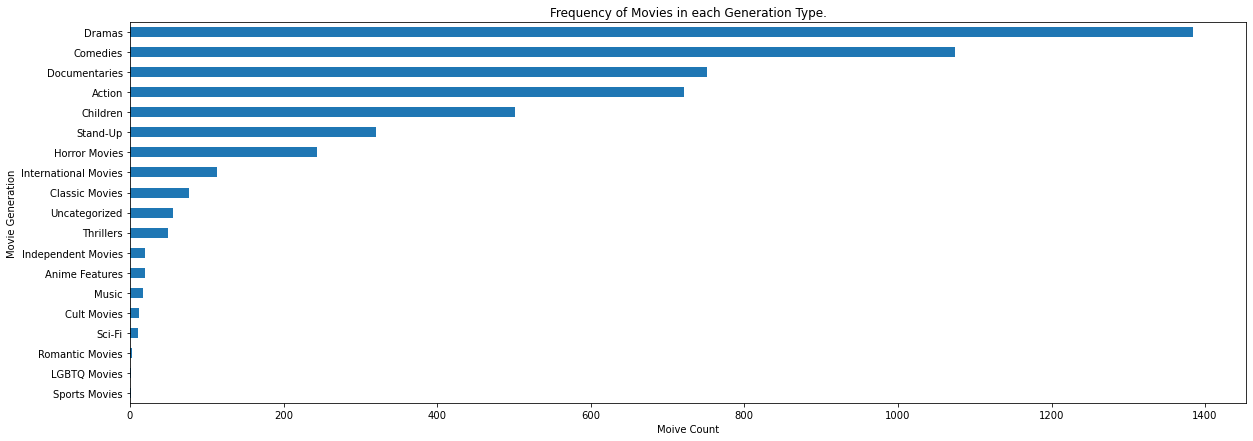

In [17]:
# plotting the bar plot for count of movies in each generation (genre)
plt.figure(figsize = (20, 7))

genre_value_counts.sort_values().plot.barh()
plt.title("Frequency of Movies in each Generation Type.")
plt.xlabel("Moive Count")
plt.ylabel("Movie Generation")

plt.show()

In [18]:
print("Number of unique values in 'release_year' is:", len(netflix_movies_col_subset['release_year'].unique()) )
release_year_value_counts = netflix_movies_col_subset['release_year'].value_counts(ascending = False)

release_year_value_counts

Number of unique values in 'release_year' is: 72


2017    744
2018    734
2016    642
2019    582
2020    411
       ... 
1947      1
1959      1
1964      1
1963      1
1946      1
Name: release_year, Length: 72, dtype: int64

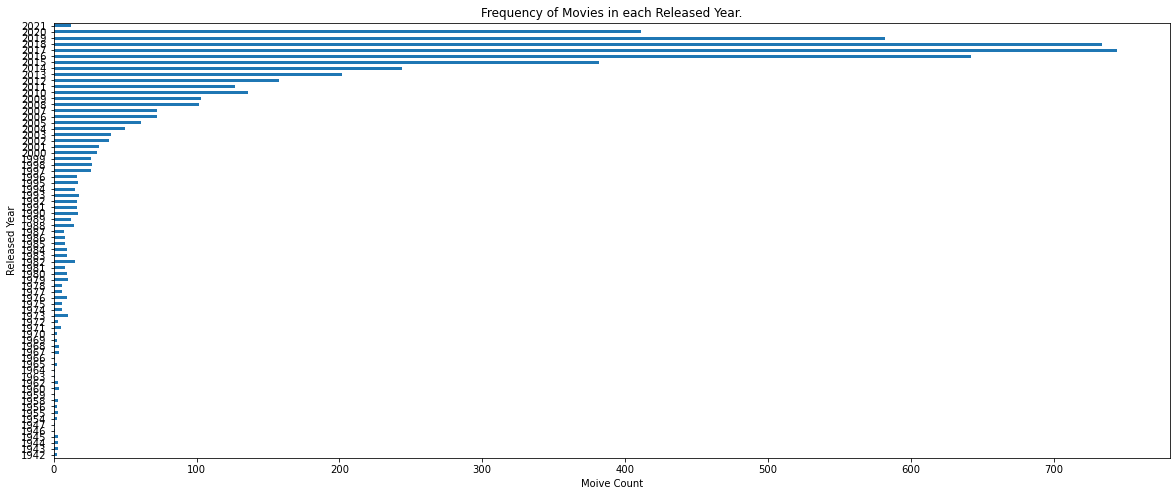

In [19]:
# plotting the bar plot for count of movies in each released_year
plt.figure(figsize = (20, 8))

release_year_value_counts.sort_index().plot.barh()
plt.title("Frequency of Movies in each Released Year.")
plt.xlabel("Moive Count")
plt.ylabel("Released Year")

plt.show()

### 7. Digging deeper
<p>This is already much more informative than the simple plot we created when our friend first gave us some data. We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.</p>
<p>Upon further inspection, something else is going on. Some of these films are under an hour long! Let's filter our DataFrame for movies with a <code>duration</code> under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.</p>

In [33]:
#  creating a new DataFrame 'short_movies' containing only movies that have a duration fewer than 60 minutes.
print("Movie minimum duration value in minutes:", netflix_movies_col_subset['duration'].min() )
print("Movie maximum duration value in minutes:", netflix_movies_col_subset['duration'].max() )

short_movies = netflix_movies_col_subset[ netflix_movies_col_subset['duration'] < 60 ]

print("Total numbe of shorts movies:", len(short_movies) )

display("First 10 short movies:", short_movies.head(10) )

Movie minimum duration value in minutes: 3
Movie maximum duration value in minutes: 312
Total numbe of shorts movies: 420


'First 10 short movies:'

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


In [36]:
short_movies_counts_by_genre = short_movies['genre'].value_counts(ascending = False)
short_movies_counts_by_genre

Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
Anime Features            3
International Movies      3
Music                     2
Horror Movies             1
Name: genre, dtype: int64

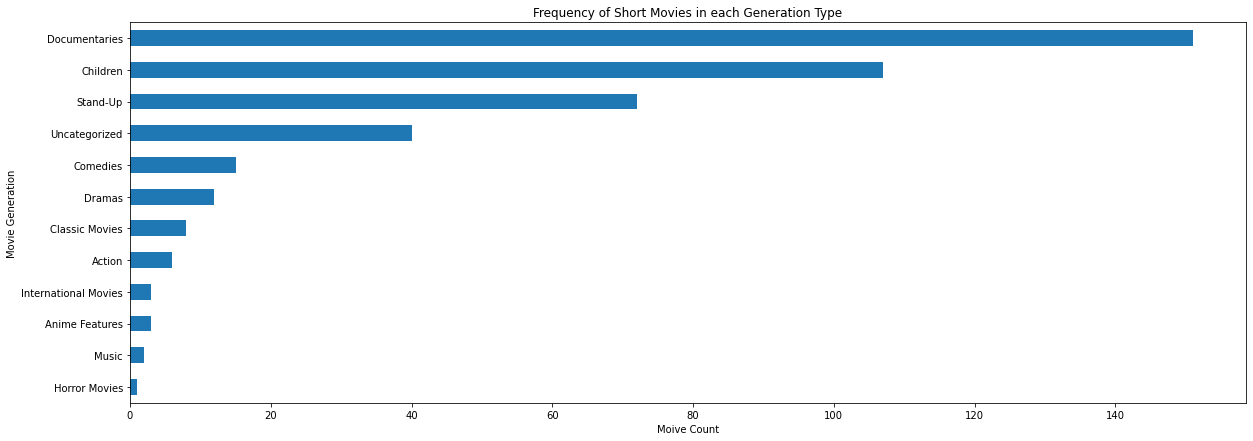

In [38]:
# plotting the bar plot for count of Short movies in each generation (genre) type
plt.figure(figsize = (20, 7))

short_movies_counts_by_genre.sort_values().plot.barh()
plt.title("Frequency of Short Movies in each Generation Type")
plt.xlabel("Moive Count")
plt.ylabel("Movie Generation")

plt.show()

### 8. Marking non-feature films
<p>Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster. </p>
<p>We could eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.</p>
<p>In Python, there are many ways to do this, but one fun way might be to use a loop to generate a list of colors based on the contents of the <code>genre</code> column. Much as we did in Intermediate Python, we can then pass this list to our plotting function in a later step to color all non-typical genres in a different color!</p>
<p><em>Note: Although we are using the basic colors of red, blue, green, and black, <code>matplotlib</code> has many named colors you can use when creating plots. For more information, you can refer to the documentation <a href="https://matplotlib.org/stable/gallery/color/named_colors.html">here</a>!</em></p>

In [44]:
# Define an empty list
colors = []

# Iterate over each row of netflix_movies_col_subset to catefories the movie gener into different colors
for x, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == "Children" :
        colors.append("red")
        
    elif row['genre'] == "Documentaries" :
        colors.append("blue")
        
    elif row['genre'] == "Stand-Up" :
        colors.append("green")
        
    else:
        colors.append("black")

In [45]:
# Inspect the first 10 values in your list        
print("First 10 values in colors list:\n",colors[:10])

First 10 values in colors list:
 ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


### 9. Plotting with color!
<p>Lovely looping! We now have a <code>colors</code> list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.</p>
<p>This time, we'll also spruce up our plot with some additional axis labels and a new theme with <code>plt.style.use()</code>. The latter isn't taught in Intermediate Python, but can be a fun way to add some visual flair to a basic <code>matplotlib</code> plot. You can find more information on customizing the style of your plot <a href="https://matplotlib.org/stable/tutorials/introductory/customizing.html">here</a>!</p>

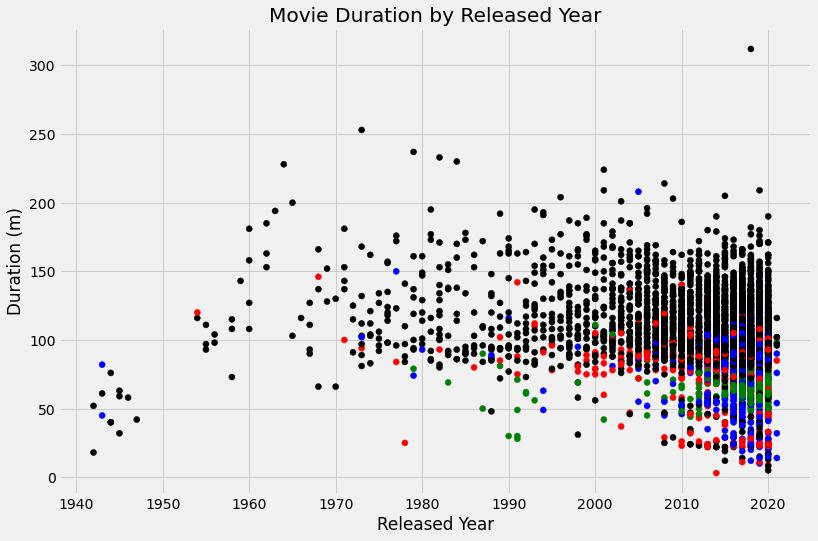

In [46]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (12,8))

TITLE = 'Movie Duration by Released Year'

# Create a scatter plot of duration versus release_year
plt.scatter(data = netflix_movies_col_subset, x = 'release_year',y ='duration', color = colors)

# Create a title and axis labels
plt.title(TITLE)
plt.xlabel("Released Year")
plt.ylabel("Duration (m)")

# Show the plot
plt.show()

### Happy Learning :)